In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import boxcox

In [42]:
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

print(data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [43]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [44]:
print(data.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [45]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


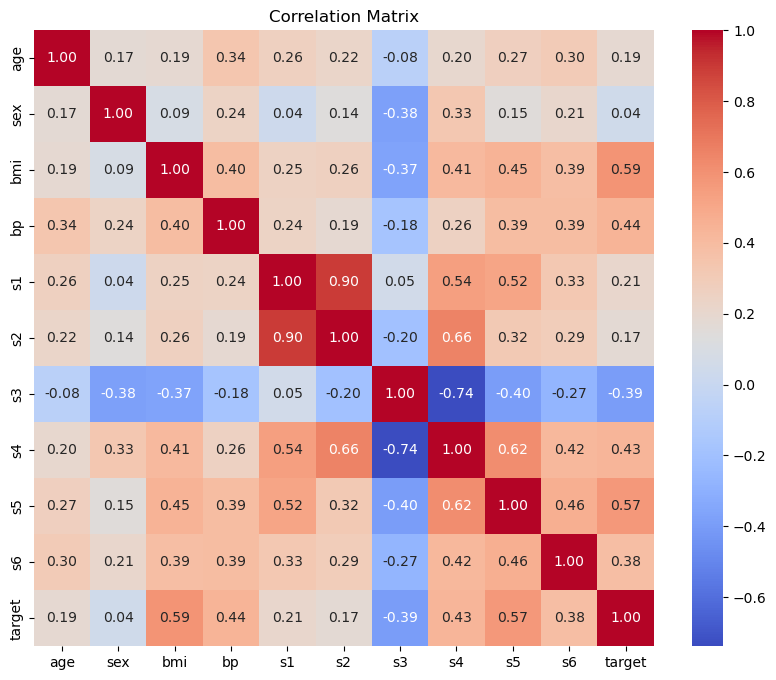

Correlation with target:
 target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [46]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("Correlation with target:\n", correlation_matrix['target'].sort_values(ascending=False))

In [47]:
# Define independent (X) and dependent (y) variables
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train:\n {X_train}\n\n")

X_train:
           age       sex       bmi        bp        s1        s2        s3  \
17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
66  -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
137  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
245 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
31  -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   
..        ...       ...       ...       ...       ...       ...       ...   
106 -0.096328 -0.044642 -0.076264 -0.043542 -0.045599 -0.034821  0.008142   
270  0.005383  0.050680  0.030440  0.083844 -0.037344 -0.047347  0.015505   
348  0.030811 -0.044642 -0.020218 -0.005670 -0.004321 -0.029497  0.078093   
435 -0.012780 -0.044642 -0.023451 -0.040099 -0.016704  0.004636 -0.017629   
102 -0.092695 -0.044642  0.028284 -0.015999  0.036958  0.024991  0.056003   

           s4        s5        s6  
17   0.034309  0.027364 -0.00

## Normalization - StandardScaler

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("X_train (Original) - First 5 rows:\n\n", X_train.head())
print("\n\n\n\n\nX_train_scaled (Normalized) - First 5 rows:\n\n", X_train_scaled.head())

print("\nX_train Means (should be non-zero):\n", X_train.mean())
print("X_train_scaled Means (should be ~0):\n", X_train_scaled.mean())
print("\nX_train Std Devs (should be non-1):\n", X_train.std())
print("X_train_scaled Std Devs (should be ~1):\n", X_train_scaled.std())

X_train (Original) - First 5 rows:

           age       sex       bmi        bp        s1        s2        s3  \
17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
66  -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
137  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
245 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
31  -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   

           s4        s5        s6  
17   0.034309  0.027364 -0.001078  
66   0.071210  0.000272  0.019633  
137 -0.002592  0.017036 -0.013504  
245 -0.039493 -0.049872 -0.129483  
31  -0.076395 -0.037129 -0.042499  





X_train_scaled (Normalized) - First 5 rows:

         age       sex       bmi        bp        s1        s2        s3  \
0  1.498365  1.061370  0.219902  1.138874  0.728473  1.055893 -0.824451   
1 -0.228858  1.061370 -0.419366 -0.710591 -0.424929  0.272425 -1.529791   
2  0.085

## Simple Linear Regression

In [49]:
# Using 'bmi' feature
simple_model = LinearRegression()
simple_model.fit(X_train_scaled[['bmi']], y_train)
y_pred_simple = simple_model.predict(X_test_scaled[['bmi']])

print("Simple Linear Regression (BMI only):")
print("R² Score:", r2_score(y_test, y_pred_simple))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_simple))

Simple Linear Regression (BMI only):
R² Score: 0.23335039815872138
Mean Squared Error: 4061.8259284949268


## Multiple Linear Regression

In [50]:
multiple_model = LinearRegression()
multiple_model.fit(X_train_scaled, y_train)
y_pred_multiple = multiple_model.predict(X_test_scaled)

# Evaluate
print("Multiple Linear Regression (All features):")
print("R² Score:", r2_score(y_test, y_pred_multiple))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_multiple))

Multiple Linear Regression (All features):
R² Score: 0.45260276297191926
Mean Squared Error: 2900.1936284934827


## D'Agostino K^2 Test

D'Agostino K^2 Test (Normality Check on Residuals):
-------------------------------------------------
Test Statistic: 0.5264
p-value: 0.7686
Skewness (should be ~0 for normal): -0.1737
Kurtosis (should be ~0 for normal): -0.0915
Result: Unsuccessful (p >= 0.5) - Residuals are close to normal
Interpretation: The residuals follow a distribution close to normal.


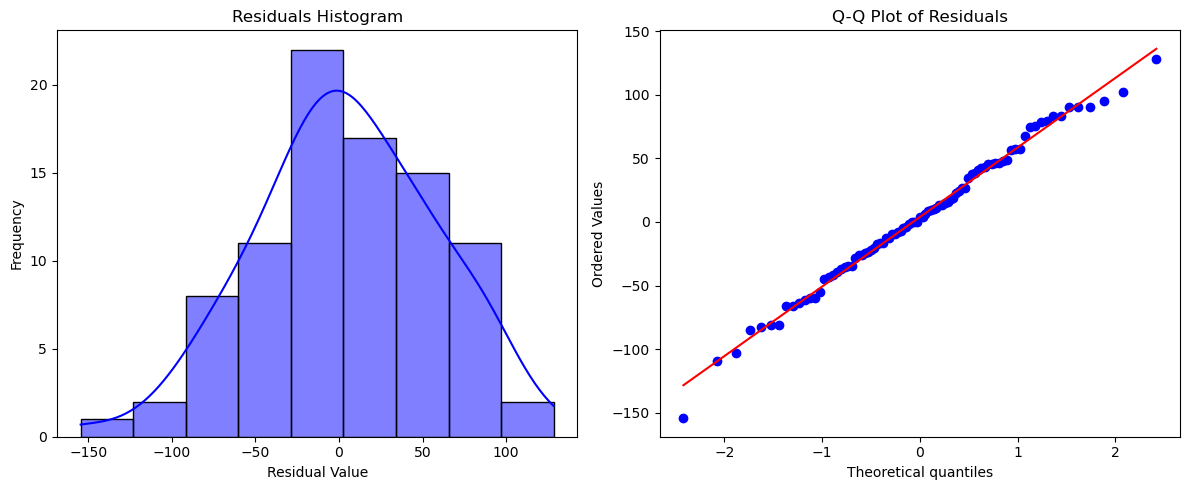


Additional Insights:
 - Skewness > 0: Right-skewed, < 0: Left-skewed
 - Kurtosis > 0: Leptokurtic (heavy tails), < 0: Platykurtic (light tails)


In [51]:
# Perform D'Agostino K^2 test on residuals to check normality
# This test combines skewness and kurtosis to assess if the data comes from a normal distribution
residuals = y_test - y_pred_multiple

# Calculate D'Agostino K^2 test statistic and p-value
stat, p_value = stats.normaltest(residuals)

# Calculate skewness and kurtosis separately for deeper insight
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)  # Excess kurtosis (normal distribution = 0)

# Print detailed results
print("D'Agostino K^2 Test (Normality Check on Residuals):")
print("-------------------------------------------------")
print(f"Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Skewness (should be ~0 for normal): {skewness:.4f}")
print(f"Kurtosis (should be ~0 for normal): {kurtosis:.4f}")

# Interpret the result based on p-value
if p_value < 0.5:
    print("Result: Successful (p < 0.5) - Residuals deviate from normality")
    print("Interpretation: The residuals are not perfectly normal, which is acceptable depending on the context.")
else:
    print("Result: Unsuccessful (p >= 0.5) - Residuals are close to normal")
    print("Interpretation: The residuals follow a distribution close to normal.")

# Visualize residuals distribution
plt.figure(figsize=(12, 5))

# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Histogram')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Additional note on skewness and kurtosis
print("\nAdditional Insights:")
print(" - Skewness > 0: Right-skewed, < 0: Left-skewed")
print(" - Kurtosis > 0: Leptokurtic (heavy tails), < 0: Platykurtic (light tails)")

Transformation Comparison Table:
  Transformation   Statistic       p-value
0       original   64.150923  1.174368e-14
1            log   47.475440  4.907262e-11
2           sqrt  121.818607  3.527163e-27
3         boxcox  106.340435  8.099680e-24


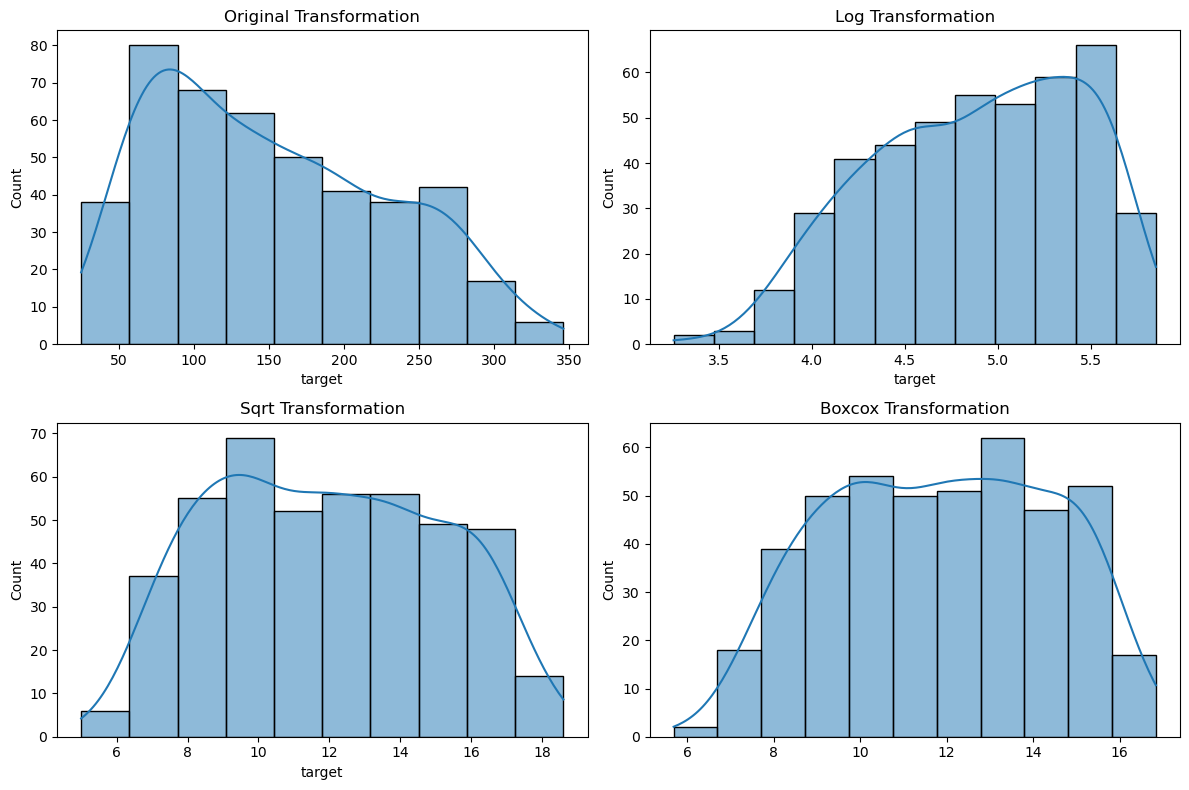

In [52]:
# Define a function to apply transformations and test normality
def apply_transformation(data, transformation_type):
    if transformation_type == 'log':
        return np.log1p(data)
    elif transformation_type == 'sqrt':
        return np.sqrt(data)
    elif transformation_type == 'boxcox':
        transformed, _ = boxcox(data + 1)  # Add 1 to avoid issues with zeros
        return transformed
    return data

# Apply transformations to the target variable and store results
transformations = ['original', 'log', 'sqrt', 'boxcox']
results = []

for trans in transformations:
    if trans == 'original':
        transformed_y = y
    else:
        transformed_y = apply_transformation(y, trans)
    
    # Perform D'Agostino test
    stat, p = stats.normaltest(transformed_y)
    results.append({'Transformation': trans, 'Statistic': stat, 'p-value': p})

results_df = pd.DataFrame(results)
print("Transformation Comparison Table:")
print(results_df)

plt.figure(figsize=(12, 8))
for i, trans in enumerate(transformations):
    plt.subplot(2, 2, i+1)
    if trans == 'original':
        sns.histplot(y, kde=True)
    else:
        sns.histplot(apply_transformation(y, trans), kde=True)
    plt.title(f'{trans.capitalize()} Transformation')
plt.tight_layout()
plt.show()

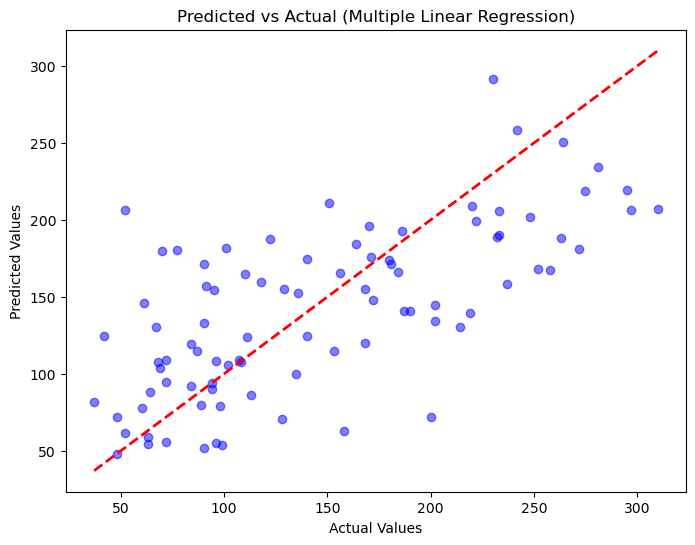

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multiple, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual (Multiple Linear Regression)')
plt.show()